# Context: Understanding the Problem Statement --------Problem Scoping (AI Project Cycle - Step 1)

Forest fires is one of the important catastrophic events and have great impact on environment, infrastructure and human life. 
This program aims to predict the burned area of the forest fires specifically in the northeast region of Portugal, based on the spatial, temporal and weather variables wusing RandomForestRegressor.

We use public dataset from UCI Machine Learning Repository: http://archive.ics.uci.edu/ml/datasets/Forest+Fires. Download forestfires.csv from this link. This prediction program can be used for calculating the forces sent to the incident and deciding the urgency of the situation.  

You can also download the dataset from Download forestfires.csv from this link: https://www.kaggle.com/datasets/elikplim/forest-fires-data-set

A random forest functions as an estimator technique that combines the output of numerous decision trees to provide the best possible outcome.
The algorithm works by building a large number of decision trees during training and then displaying the mean/mode of the output for each tree. 
There is no contact between the individual trees in a random forest thus protecting each other from individual errors. 

### Import the useful Packages & Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

C:\Users\Hp\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Hp\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\Hp\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


## Dataset: Data Acquisition (AI Project Cycle - Step 2)

We use public dataset from UCI Machine Learning Repository : http://archive.ics.uci.edu/ml/datasets/Forest+Fires. 
This prediction can be used for calculating the forces sent to the incident and deciding the urgency of the situation. 


### Load/Read the Dataset

In [2]:
# For importing dataset, do this following steps:
df = pd.read_csv(r"C:\Users\Hp\Downloads\forestfires.csv")

# Displaying top 10 rows of dataset
df.head(5)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


### Statistical description of the dataset

In [3]:
df.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


### Shape

In [4]:
df.shape

(517, 13)

### Data types

In [5]:
df.dtypes

X          int64
Y          int64
month     object
day       object
FFMC     float64
DMC      float64
DC       float64
ISI      float64
temp     float64
RH         int64
wind     float64
rain     float64
area     float64
dtype: object

# Data Preprocessing ------ Data Exploration(AI Project Cycle - Step 3)¶

**Data Preprocessing consists of EDA/Data Cleaning/Feature Engineering**

We have listed below all the basic steps involved in Data Pre-processing but we may not require all of them for all problems. It will depend on the nature of the dataset in hand.. you will have to figure out which steps are essential for your problem statement. 

**In this particular problem, will be using steps - 
EDA(1,4,5) Feature Engineering(1,2)**

-----------------------------------------------------------------------------------------------------------------------------

**Exploratory Data Analysis (EDA)** - goal is to maximize the insight into a dataset and understand the underlying structure of a dataset.

1.	Explore the data- view the information of data
2.	Find null values/missing values
3.	Fill the missing values- use fillna (mean,median or mode)
4.	Convert categorical values to numerical values if required (one hot encoding, label encoders)
5.	Data scaling/standardization

**Data Cleaning** - goal is to assure that the data is useful,functional and consistent towards the intended end analysis.

1. Remove any ambiguity from the data if any
2. Remove any extra symbols from the data if any for eg -₹2000 $2000 ---> 2000
3. Renaming columns

**Feature Engineering** - goal is to reduce the number of input features to those that are believed to be most useful to a model and thereby speeding up the process. Data can also be leveraged to create new variables that aren't in the training set.

1. Drop unnecessary features
2. Creating new features


### View the information of data

In [6]:
# info() helps summarize the dataset
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


### Check if there are any missing values in data

In [7]:
df.isnull().sum() 

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

### Skewness and Kurtosis

In [8]:
print("Skew: \n{}\n".format(df.skew()))
print("Kurtosis: \n{}".format(df.kurtosis()))

Skew: 
X        0.036246
Y        0.417296
FFMC    -6.575606
DMC      0.547498
DC      -1.100445
ISI      2.536325
temp    -0.331172
RH       0.862904
wind     0.571001
rain    19.816344
area    12.846934
dtype: float64

Kurtosis: 
X        -1.172331
Y         1.420553
FFMC     67.066041
DMC       0.204822
DC       -0.245244
ISI      21.458037
temp      0.136166
RH        0.438183
wind      0.054324
rain    421.295964
area    194.140721
dtype: float64


**Skew** is the degree of distortion from a normal distribution. skewed, meaning there are a minority of very large values.

**Kurtosis** is all about the tails of the distribution — not the peakedness or flatness. It is used to describe the extreme values in one versus the other tail. It is actually the measure of outliers present in the distribution . High kurtosis in a data set is an indicator that data has heavy tails or outliers.

**If skewness is positive, the data are positively skewed or skewed right, meaning that the right tail of the distribution is longer than the left. If skewness is negative, the data are negatively skewed or skewed left, meaning that the left tail is longer.**

**If skewness is less than −1 or greater than +1, the distribution is highly skewed.
If skewness is between −1 and −½ or between +½ and +1, the distribution is moderately skewed.
If skewness is between −½ and +½, the distribution is approximately symmetric.**

A normal distribution has kurtosis exactly 3 (excess kurtosis exactly 0). Any distribution with kurtosis ≈3 (excess ≈0) is called mesokurtic.
A distribution with kurtosis <3 (excess kurtosis <0 ) is called platykurtic. Compared to a normal distribution, its tails are shorter and thinner, and often its central peak is lower and broader.
A distribution with kurtosis >3 (excess kurtosis >0) is called leptokurtic. Compared to a normal distribution, its tails are longer and fatter, and often its central peak is higher and sharper.

**Feature columns:- 'ISI', & 'rain' have +ve skewness, value more than +1 so, they are right skewed.**

**Feature columns:- 'FFMC', & 'temp' have -ve skewness, value less than -1 so, they are left skewed.**

**Feature columns:- 'FFMC', 'ISI', & 'rain' have higher kurtosis value. i,e have outliers.**

Feature columns with (high, +ve, or -ve) outliers, skewness and kurtosis are:

                   1. FFMC
                   2. ISI
                   3. rain
**Target column 'area' has also outliers**

In [9]:
outlier_columns = ['area','FFMC','ISI','rain']

### Visualizing skewness using kdeplot

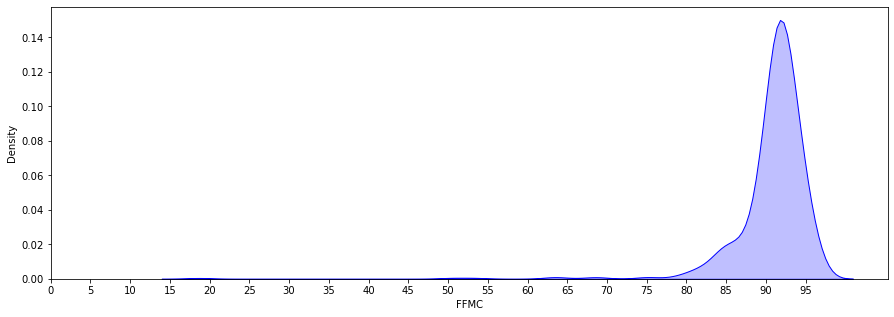

In [10]:
# FFMC Feature
plt.figure(figsize=(15,5))
ax = sns.kdeplot(df['FFMC'],shade=True,color='b')
plt.xticks([i for i in range(0,100,5)])
plt.show()

#### FFMC is left skewed.

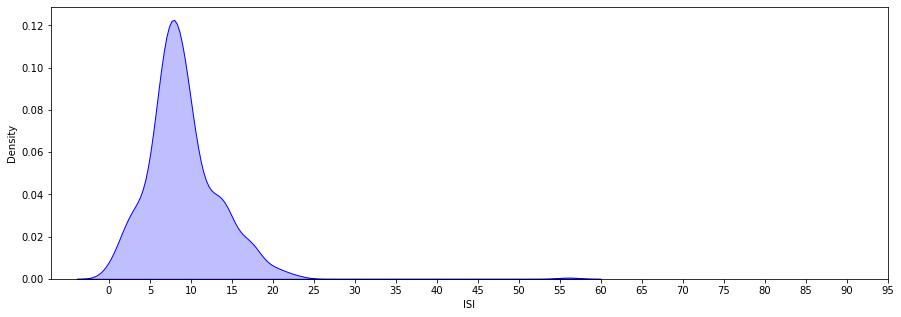

In [11]:
# ISI Feature
plt.figure(figsize=(15,5))
ax = sns.kdeplot(df['ISI'],shade=True,color='b')
plt.xticks([i for i in range(0,100,5)])
plt.show()

#### ISI is left skewed.

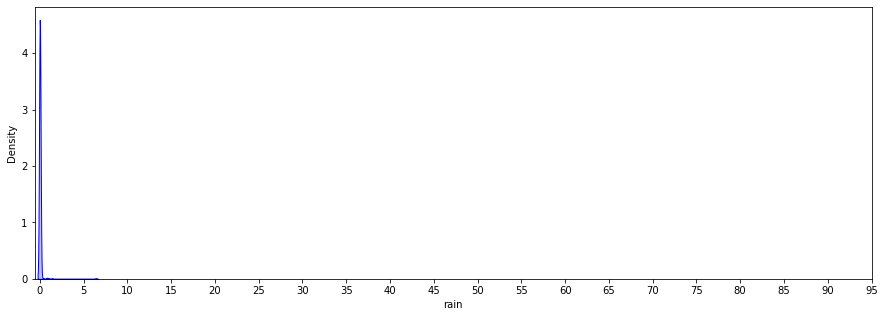

In [12]:
# Rain Feature
plt.figure(figsize=(15,5))
ax = sns.kdeplot(df['rain'],shade=True,color='b')
plt.xticks([i for i in range(0,100,5)])
plt.show()

#### The 'rain' feature is for sure right skewed. This graph shows that the values for rain feature fall in a very specific range. And also it can be seen  that these values keep getting repeated for multiple rows.

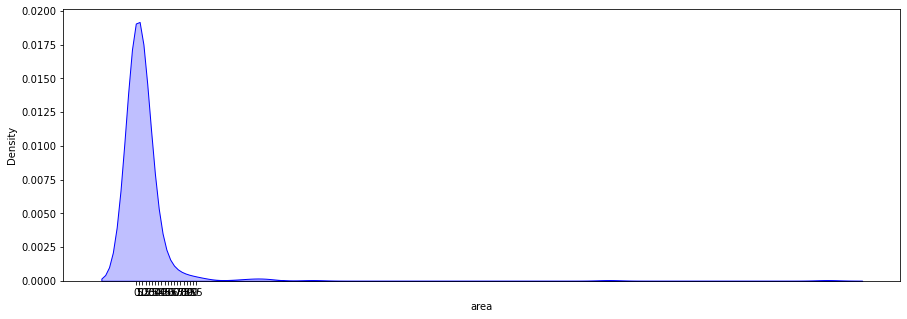

In [13]:
# area target column

plt.figure(figsize=(15,5))
ax = sns.kdeplot(df['area'],shade=True,color='b')
plt.xticks([i for i in range(0,100,5)])
plt.show()

#### area is right skewed.

### Log Transformation is used to make skewed data more normal (for FFMC)
Log transformation is a data transformation method in which it replaces each variable x with a log(x). We have 3 right skewed features and one left skewed. Reason for using log(x+1) transformation is to avoid the log(x) approaching negative infinity.

In [14]:
np.log(df[outlier_columns]+1).skew()

area     1.217838
FFMC   -11.675394
ISI     -0.937218
rain    14.173028
dtype: float64

#### We can see that after log tranformation the skewness for the columns have improved except FFMC and rain feature.

In [15]:
np.log(df[outlier_columns]+1).kurtosis()

area      0.945668
FFMC    185.482383
ISI       2.584588
rain    234.240025
dtype: float64

#### After log tranformation the kurtosis values for all the columns have improved except for FFMC and rain.

#### We have not yet applied the log transformations to the original dataframe 'df'.

In [16]:
df.FFMC

0      86.2
1      90.6
2      90.6
3      91.7
4      89.3
       ... 
512    81.6
513    81.6
514    81.6
515    94.4
516    79.5
Name: FFMC, Length: 517, dtype: float64

### We will calculate z score for all values of 'FFMC' feature. 
A z-score is important because it tells where our data lies in the 
data distribution. 
For example, if a z-score is 1.5, it is 1.5 standard deviations away from the mean.

In [17]:
from scipy.stats import zscore
z_sc = df.loc[:,['FFMC']].apply(zscore)
print("Z score for all the values of FFMC feature are:\n\n",z_sc)

Z score for all the values of FFMC feature are:

          FFMC
0   -0.805959
1   -0.008102
2   -0.008102
3    0.191362
4   -0.243833
..        ...
512 -1.640083
513 -1.640083
514 -1.640083
515  0.680957
516 -2.020879

[517 rows x 1 columns]


#### We will find absolute values of z scores. And any score >3 will be treated as outlier. And in the subsequent steps we will be deleting instances from dataset that contain these outliers.

In [18]:
outlier_mask=z_sc.abs() < 3
print("outlier mask is",outlier_mask)

outlier mask is      FFMC
0    True
1    True
2    True
3    True
4    True
..    ...
512  True
513  True
514  True
515  True
516  True

[517 rows x 1 columns]


In [19]:
outlier_mask.shape

(517, 1)

In [20]:
df = df[outlier_mask.values]

In [21]:
df.shape

(510, 13)

After applying outlier mask to the dataframe, we can see the change in the shape of dataframe. Instead of 517 rows, we have 501 rows in the dataframe. Around 7 instances that had 'False' value for FFMC feature are deleted.

### Rain feature outliers 

In [22]:
# Displaying count of unique values in rain feature
df['rain'].nunique()

7

In [23]:
# Displaying all values in rain feature
df.rain.values

array([0. , 0. , 0. , 0.2, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.

#### Since most of the values in rain feature are 0. We can convert rain feature into categorical feature.Values >0.0 will be stored as 1. All other values will be stored as 0.

In [24]:
df['rain'] = df['rain'].apply(lambda x: int(x > 0.0))

In [25]:
df['rain'].unique()

array([0, 1], dtype=int64)

#### No need to keep 'rain' feature in outlier column list, as it is no more a numerical feature.

In [26]:
outlier_columns.remove('rain')

In [27]:
outlier_columns

['area', 'FFMC', 'ISI']

#### Till this stage we have removed outliers from FFMC feature. And we have seen earlier that log transformation works well for ISI and area feature.

In [28]:
df[outlier_columns] = np.log(df[outlier_columns]+1)

#### Skew and Kurtosis values are recomputed for the outliers. And we can see we have got the acceptable values. 

In [29]:
df[outlier_columns].skew()

area    1.208492
FFMC   -1.803993
ISI    -0.434372
dtype: float64

In [30]:
df[outlier_columns].kurtosis() 

area    0.923414
FFMC    4.866747
ISI     1.122574
dtype: float64

### Deriving insights from the data
Exploring the data would help one discover meaningful insights, and these insights can be derived by asking meaningful questions using the data. Let’s get started!

#### At what month did the largest forest fires occur?

Text(0.5, 1.0, 'Month With the highest forest burnt area')

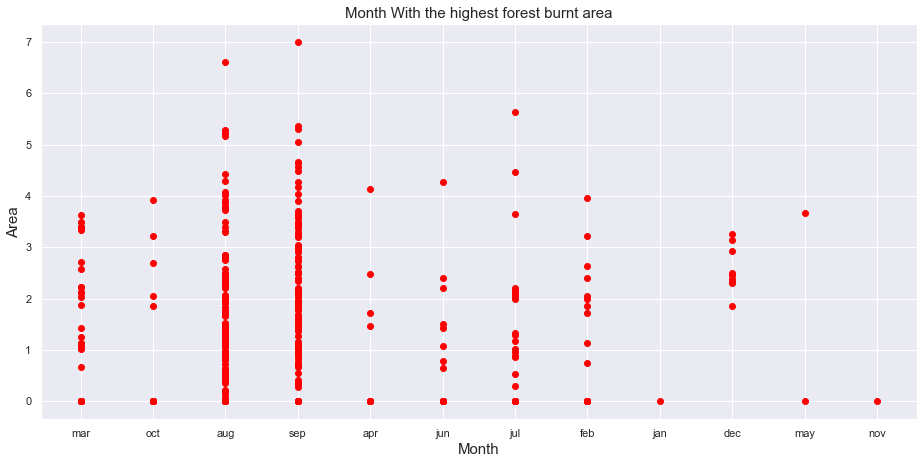

In [31]:
sns.set(rc={'figure.figsize':(15.7,7.27)})
plt.scatter(x=df["month"], y=df["area"], color = 'red')
plt.xlabel("Month", size = 15)
plt.ylabel("Area", size = 15)
plt.title("Month With the highest forest burnt area", size = 15)

Answer: The month September had the largest forest fires in terms of burnt areas, next to August and then July. 
What does this imply? Weather is obviously one of the factors that affects forest fire size.

#### Do most forest fires occur during weekdays or weekends?

Text(0.5, 1.0, 'Fire Count for each Day in the Montesinho park')

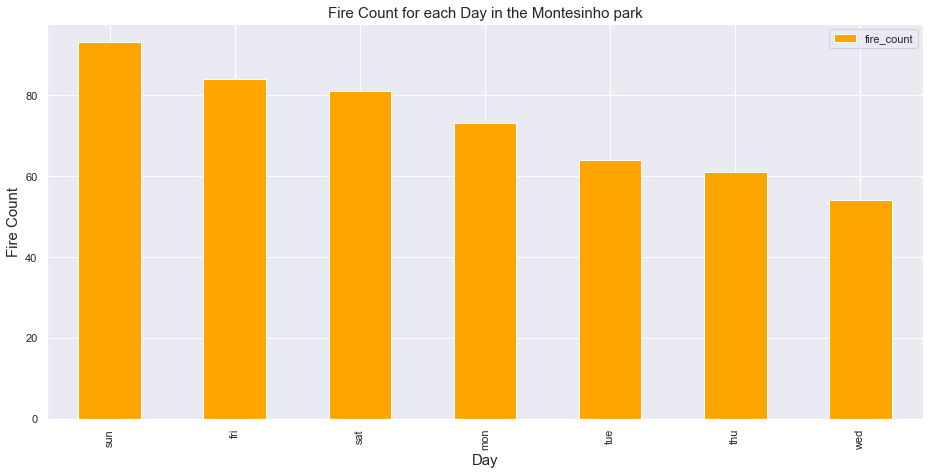

In [32]:
days_of_fire = df['day'].value_counts()
days_of_fire = days_of_fire.to_frame()
days_of_fire = days_of_fire.reset_index()
days_of_fire.columns = ['day', 'fire_count']
days_of_fire.plot.bar(x = 'day', y= 'fire_count', color = 'orange')
plt.xlabel("Day", size = 15)
plt.ylabel("Fire Count", size = 15)
plt.title("Fire Count for each Day in the Montesinho park", size = 15)

Answer: Majority of the forest fires occured during days when there was less working activity (Sunday, Friday and Saturday). 
This could imply that forest fires are most likely to happen on week-ends than week days.

#### Does high temperatures imply larger forest fire in terms of area?

<AxesSubplot:xlabel='temp'>

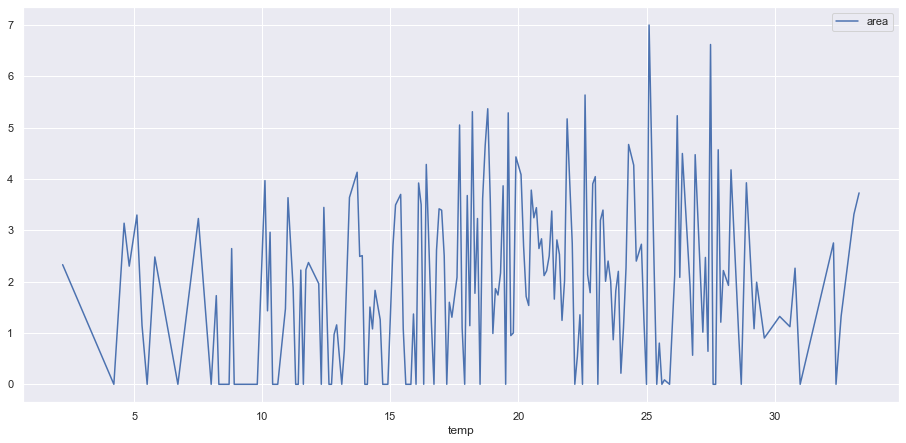

In [33]:
temp_by_area = df.groupby(['temp'], sort=True)['area'].max()
temp_by_area = temp_by_area.to_frame()
temp_by_area = temp_by_area.reset_index()
temp_by_area.columns = ['temp', 'area']
temp_by_area.plot(y ='area', x = 'temp')

Answer: Larger forest fire were associated with high temperature.

### Relationships between all variables using pairplot
Relationships between other variables can still be decided. A quick way to do that would be to plot the pairwise relationship between features/variables present in the data.

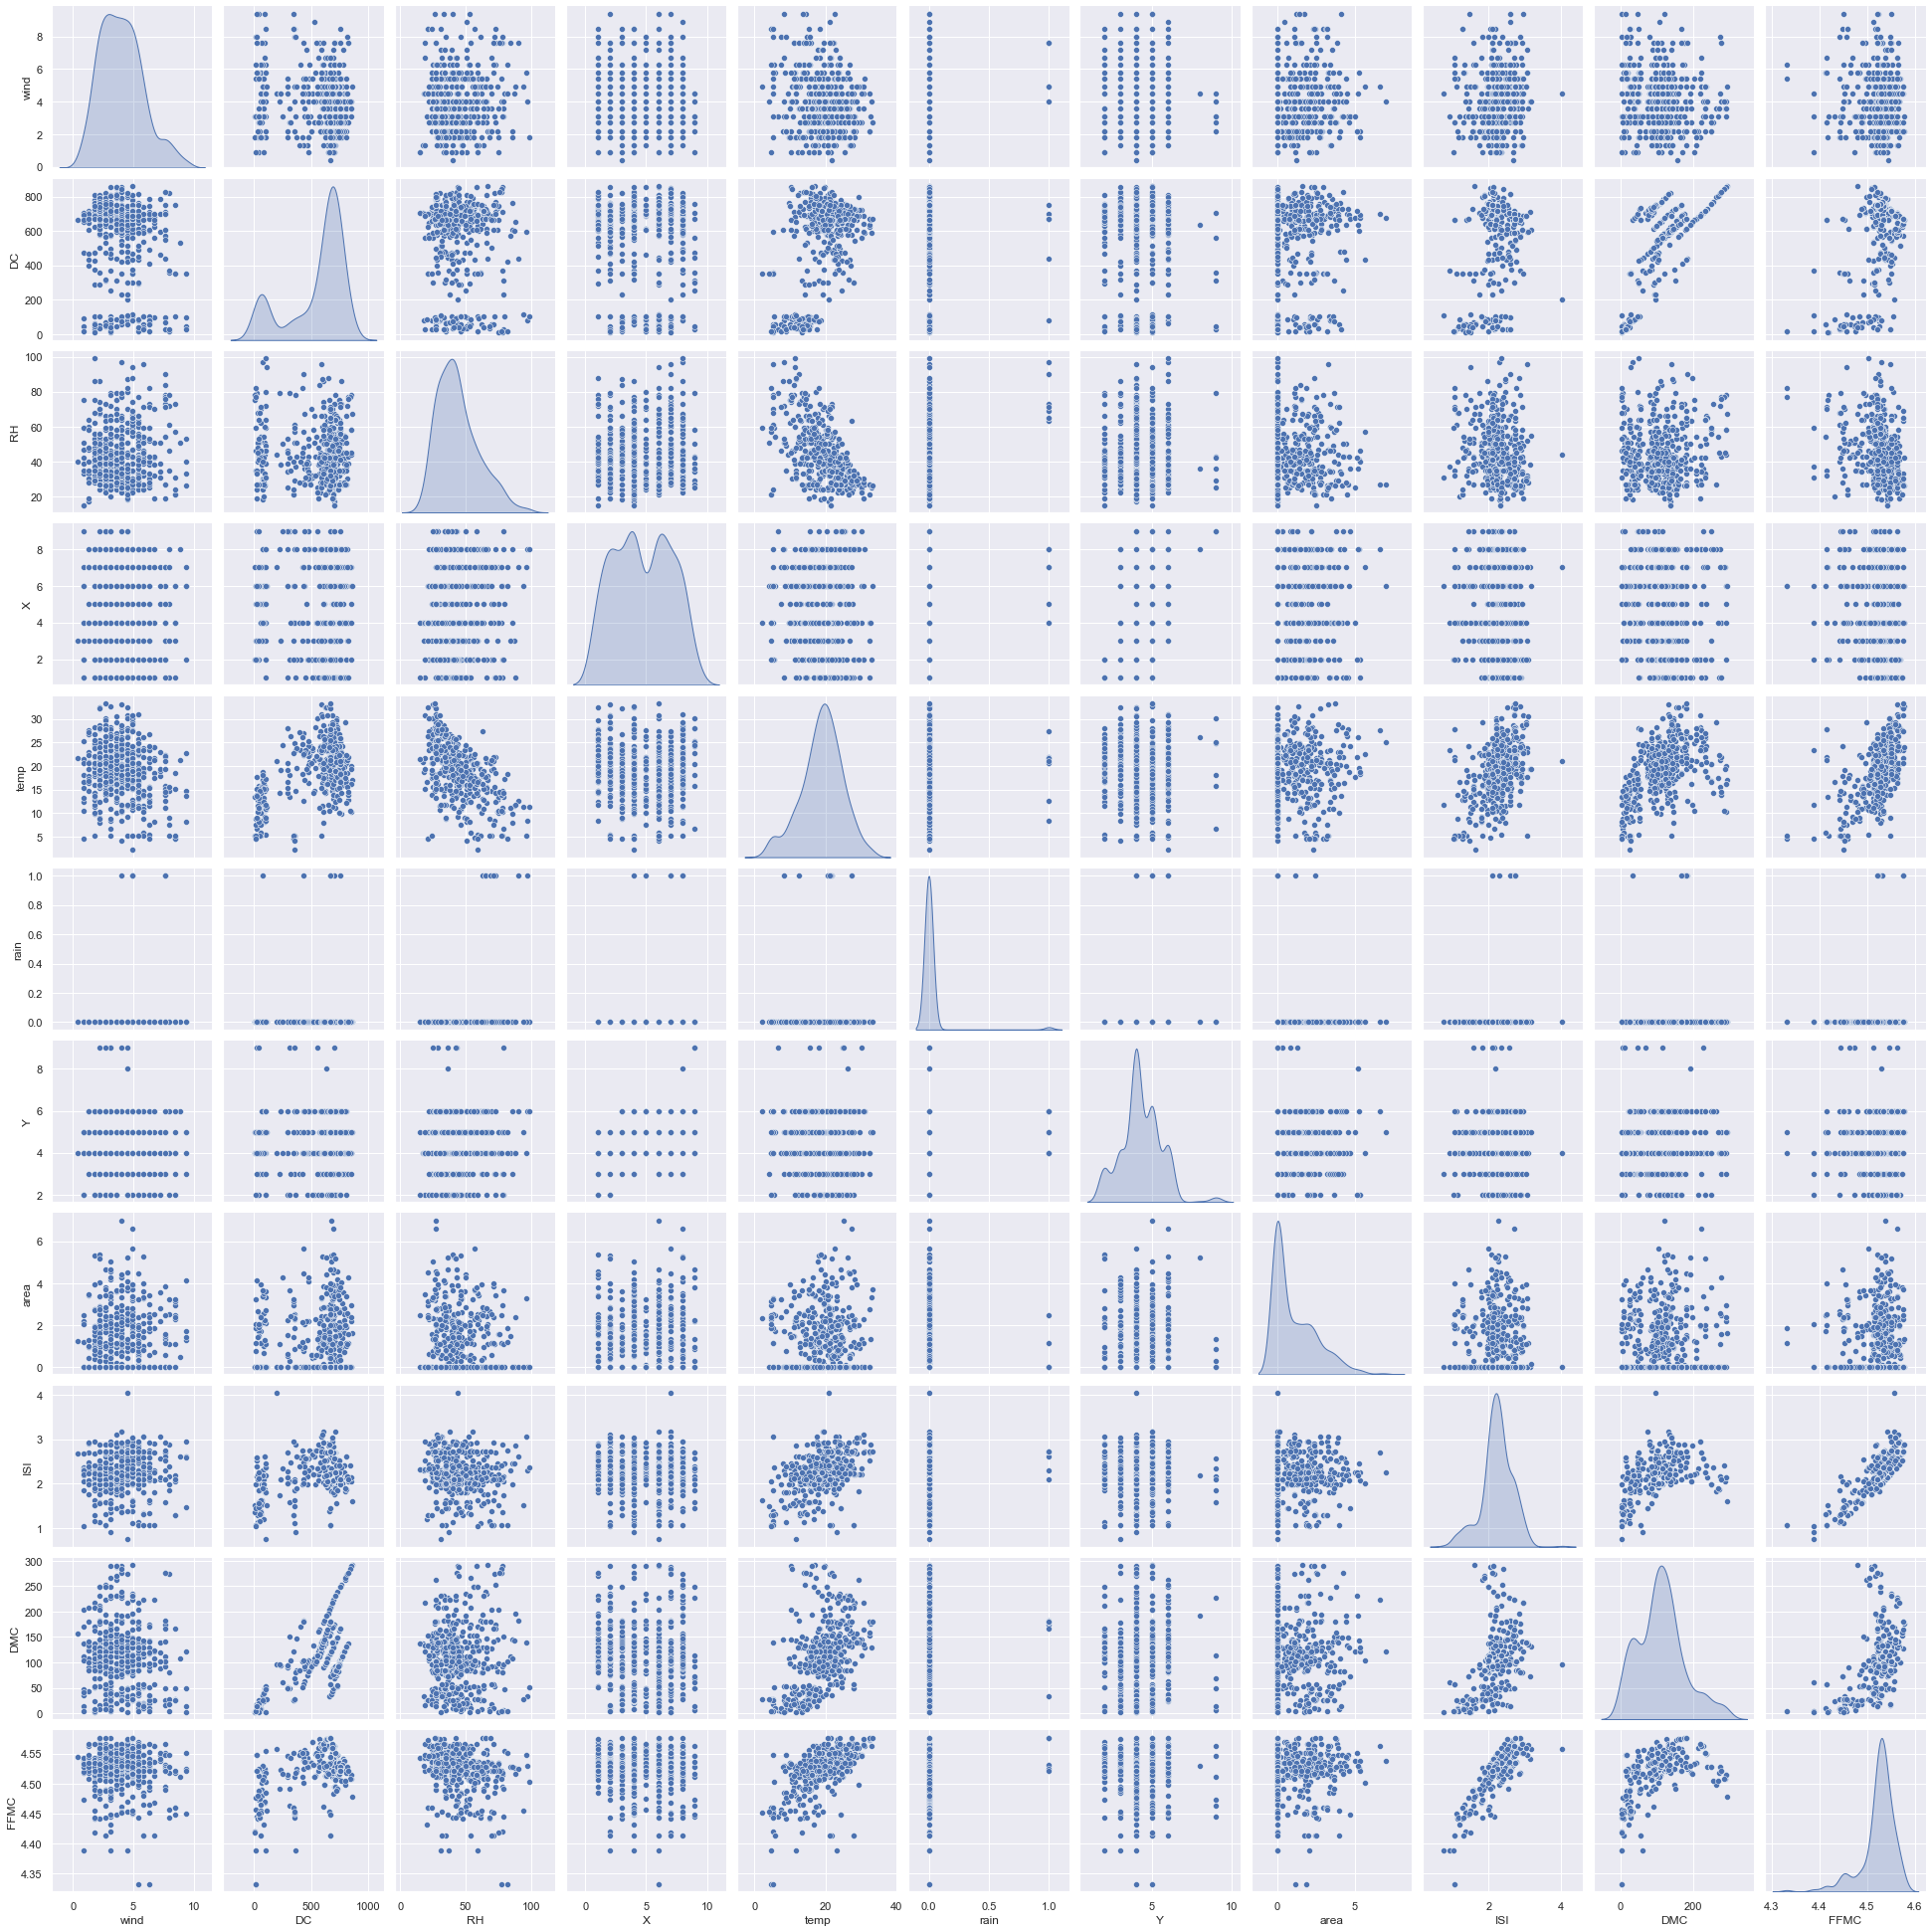

In [34]:
sns.pairplot(data=df, diag_kind='kde', vars={'DC','FFMC','DMC','temp','X','Y','area',
                                             'ISI', 'RH', 'wind', 'rain'})
plt.show()

### Relationships between all variables using Correlation Coefficient
Correlation coefficient are easily interpreted. The correlation coefficient measures the strength and direction of a linear relationship between two variables.

In [35]:
df.corr(method ='pearson')

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
X,1.000000,0.541689,-0.090886,-0.055591,-0.088945,-0.025297,-0.053240,0.086835,0.020216,0.105892,0.062729
Y,0.541689,1.000000,-0.027739,0.013456,-0.095575,-0.009345,-0.018506,0.056063,-0.016625,0.072246,0.043686
FFMC,-0.090886,-0.027739,1.000000,0.500947,0.471892,0.829816,0.590267,-0.266816,-0.094211,0.102803,-0.011869
DMC,-0.055591,0.013456,0.500947,1.000000,0.680936,0.393619,0.464535,0.093093,-0.109418,0.096003,0.058225
DC,-0.088945,-0.095575,0.471892,0.680936,1.000000,0.333561,0.494497,-0.033338,-0.217087,0.015981,0.057619
ISI,-0.025297,-0.009345,0.829816,0.393619,0.333561,1.000000,0.456780,-0.131547,0.068924,0.102249,-0.021918
temp,-0.053240,-0.018506,0.590267,0.464535,0.494497,0.456780,1.000000,-0.518036,-0.237768,0.009514,0.043366
RH,0.086835,0.056063,-0.266816,0.093093,-0.033338,-0.131547,-0.518036,1.000000,0.079059,0.238157,-0.041091
wind,0.020216,-0.016625,-0.094211,-0.109418,-0.217087,0.068924,-0.237768,0.079059,1.000000,0.125936,0.068835
rain,0.105892,0.072246,0.102803,0.096003,0.015981,0.102249,0.009514,0.238157,0.125936,1.000000,-0.060269


The Pearson correlation measures the strength of the linear relationship between two variables. It has a value between -1 to 1, with a value of -1 meaning a total negative linear correlation, 0 being no correlation, and + 1 meaning a total positive correlation.

#### Let's plot a Heatmap based on the results we just got.

<AxesSubplot:>

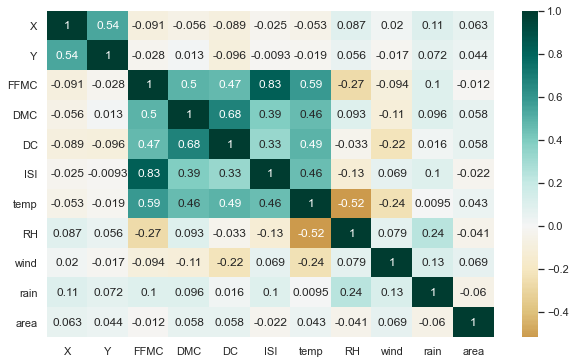

In [36]:
# Creating a Heatmap
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(df.corr(), center=0, cmap='BrBG', annot=True)

A correlation heatmap displays a 2D correlation matrix between two discrete dimensions and uses colored cells to represent data.
The darker the color, the stronger the relationship between variables and vice–versa.

### Feature Engineering - Hot Encoding
Hot Encoding is a form of feature engineering that transforms categorical features to a format that works better with classification and regression algorithms. It’s very useful in methods where multiple types of data representation is necessary.

Features to be hot-encoded would be all categorical variables within the data. These are- X, Y, Month, Day.

In [37]:
df.X.unique()

array([7, 8, 6, 5, 4, 2, 9, 1, 3], dtype=int64)

In [38]:
df.Y.unique()

array([5, 4, 6, 3, 2, 9, 8], dtype=int64)

In [39]:
df.day.unique()

array(['fri', 'tue', 'sat', 'sun', 'mon', 'wed', 'thu'], dtype=object)

In [40]:
# one hot encoding coordinates X and Y
df_X = pd.get_dummies(df.X)
df_Y = pd.get_dummies(df.Y)

# one hot encode the month variable
df_month = pd.get_dummies(df.month)

# rename the columns in both dataframe
df_X.columns = ['1_X', '2_X', '3_X', '4_X', '5_X', '6_X', '7_X', '8_X', '9_X']
df_Y.columns = ['2_Y', '3_Y', '4_Y', '5_Y', '6_Y', '8_Y', '9_Y']

# concatenate the two dataframes together
df_xy = pd.concat([df_X, df_Y], axis=1)

# concat them with the main dataframe
df = pd.concat([df_xy, df_month, df], axis =1)

In [41]:
# Dropping 'X','Y','month' from dataset because we have done their hot encoding

df.drop(['X','Y','month'], axis=1, inplace=True)

In [42]:
# We can see new columns that are added because of one hot encoding.

df.columns

Index(['1_X', '2_X', '3_X', '4_X', '5_X', '6_X', '7_X', '8_X', '9_X', '2_Y',
       '3_Y', '4_Y', '5_Y', '6_Y', '8_Y', '9_Y', 'apr', 'aug', 'dec', 'feb',
       'jan', 'jul', 'jun', 'mar', 'may', 'nov', 'oct', 'sep', 'day', 'FFMC',
       'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area'],
      dtype='object')

### Feature Engineering - Conversion to Another Unit
Numerical Features to be converted to other units are — Temperature(Celcius) and Windspeed(Km/hr).
Note: 1 degree Celsius = 33.8 degrees Fahrenheit, 1km/hr to seconds is 0.277777778m/sec

In [43]:
# convert temperature in celcius degree to fahreneit

df['temp_F'] = df['temp']*1.8 - 32

df['wind_m/s'] = df['wind'] * 0.277777778


In [44]:
df.drop(['temp','wind'], axis=1, inplace=True)

### Feature Engineering - Binary Encoding
Binary Encoding is a memory-efficient encoding scheme as it uses fewer features than one-hot encoding. Further, It reduces the curse of dimensionality for data with high cardinality.

The day feature would be categorized into weekdays and weekends using binarizing.

In [45]:
df['weekends'] = df['day'].apply(lambda x: 1 if x == 'sun' or x == 'sat' else 0)

In [46]:
# We have added 'weekends' column, no need to keep 'day' feature in dataet 

df.drop(['day'], axis=1, inplace=True)

In [47]:
# The final columns in teh dataset after Feature Engineering

df.columns

Index(['1_X', '2_X', '3_X', '4_X', '5_X', '6_X', '7_X', '8_X', '9_X', '2_Y',
       '3_Y', '4_Y', '5_Y', '6_Y', '8_Y', '9_Y', 'apr', 'aug', 'dec', 'feb',
       'jan', 'jul', 'jun', 'mar', 'may', 'nov', 'oct', 'sep', 'FFMC', 'DMC',
       'DC', 'ISI', 'RH', 'rain', 'area', 'temp_F', 'wind_m/s', 'weekends'],
      dtype='object')

### Splitting the dataframe into independent(features) and dependent features(targets)

In [48]:
X = df.drop(columns = ['area'], axis =1)
y = df['area']

In [49]:
X.columns

Index(['1_X', '2_X', '3_X', '4_X', '5_X', '6_X', '7_X', '8_X', '9_X', '2_Y',
       '3_Y', '4_Y', '5_Y', '6_Y', '8_Y', '9_Y', 'apr', 'aug', 'dec', 'feb',
       'jan', 'jul', 'jun', 'mar', 'may', 'nov', 'oct', 'sep', 'FFMC', 'DMC',
       'DC', 'ISI', 'RH', 'rain', 'temp_F', 'wind_m/s', 'weekends'],
      dtype='object')

In [50]:
y

0      0.000000
1      0.000000
2      0.000000
3      0.000000
4      0.000000
         ...   
512    2.006871
513    4.012592
514    2.498152
515    0.000000
516    0.000000
Name: area, Length: 510, dtype: float64

### Scaling the data

In [51]:
# When a dataset has different columns(features) at different scales, It is important to standardize 
# and put everything on same scale. This process is called Scaling.
# Performing scaling on the dataframe using minmaxscaler()
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled = scaler.fit_transform(X)
print(scaled)

[[0.         0.         0.         ... 0.19292605 0.7        0.        ]
 [0.         0.         0.         ... 0.50803859 0.05555556 0.        ]
 [0.         0.         0.         ... 0.39871383 0.1        1.        ]
 ...
 [0.         0.         0.         ... 0.61093248 0.7        1.        ]
 [1.         0.         0.         ... 0.75241158 0.4        1.        ]
 [0.         0.         0.         ... 0.30868167 0.45555556 0.        ]]


In [52]:
# Converting the output received -scaled (which is in array form) to dataframe
X = pd.DataFrame(scaled, index=X.index, columns=X.columns)
X

,1_X,2_X,3_X,4_X,5_X,6_X,7_X,8_X,9_X,2_Y,...,sep,FFMC,DMC,DC,ISI,RH,rain,temp_F,wind_m/s,weekends
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.556369,0.080472,0.101325,0.322856,0.428571,0.0,0.192926,0.700000,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.757524,0.112383,0.775419,0.393380,0.214286,0.0,0.508039,0.055556,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.757524,0.141172,0.796294,0.393380,0.214286,0.0,0.398714,0.100000,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.806302,0.105099,0.081623,0.472513,0.976190,1.0,0.196141,0.400000,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.699115,0.167534,0.110590,0.490155,1.000000,0.0,0.295820,0.155556,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.334916,0.186264,0.771315,0.097725,0.202381,0.0,0.823151,0.255556,1.0
513,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.334916,0.186264,0.771315,0.097725,0.666667,0.0,0.633441,0.600000,1.0
514,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.334916,0.186264,0.771315,0.097725,0.654762,0.0,0.610932,0.700000,1.0
515,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.923619,0.496011,0.711622,0.535190,0.321429,0.0,0.752412,0.400000,1.0


In [53]:
y

0      0.000000
1      0.000000
2      0.000000
3      0.000000
4      0.000000
         ...   
512    2.006871
513    4.012592
514    2.498152
515    0.000000
516    0.000000
Name: area, Length: 510, dtype: float64

### Splitting dataset into separate training and test set¶

In [54]:
# split dataset into train and test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [55]:
len(X_train)

357

In [56]:
len(X_test)

153

In [57]:
X_train.shape

(357, 37)

In [58]:
y_train.shape

(357,)

In [59]:
y_test.shape

(153,)

# Building a Model ------ Modeling ( AI Project Cycle - Step 4)

### RandomForestRegressor using default parameters

In [60]:
# import the library for RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(random_state = 42)

# Look at the default parameters used by RandomForestRegressor
print('Parameters currently in use:\n')
print(regressor.get_params())

Parameters currently in use:

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


In [61]:
# Fit the model on training data

regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

### Making Predictions and Observing Accuracy

In [62]:
# Model predicts the 'area' values  for the training data

y_pred = regressor.predict(X_test)

In [63]:
print(y_pred)

[0.80607392 1.29742409 0.81183616 0.70212173 0.87058875 0.64409598
 0.93333697 1.22638847 1.93140853 1.44720729 2.31002005 0.72680302
 0.52258861 0.79677847 1.93809569 1.29173505 1.45471984 2.73966442
 1.12891991 0.82349627 1.59138698 0.91792222 1.61474758 0.9281284
 1.50444574 0.73930906 0.71965926 1.6529351  0.95557787 0.7114851
 0.18323882 0.4026321  0.89068373 1.08368201 0.25789509 1.34336438
 1.55765845 3.04073918 0.36164553 0.81902694 1.89124891 1.34593904
 0.97493729 0.95445387 0.8375272  1.00163059 1.00375709 0.45859352
 0.62900891 1.25171788 1.08149975 0.91191048 0.68741691 0.96694607
 1.30356686 0.88697987 0.45725101 2.26840006 0.98097575 0.83416581
 0.46640811 1.09165407 1.71354262 1.48789953 1.30509944 1.11535736
 1.53034886 2.02150484 0.71081548 0.75518202 1.76215892 1.27771892
 0.88168889 1.11988412 0.77903395 1.66116303 0.81879435 1.94956814
 0.3599308  1.10429184 0.57472802 0.50841905 1.83318678 1.08788245
 1.70928287 1.4296893  0.64069583 1.00967743 1.48620715 0.943696

In [64]:
# Root mean square log error is a very robust option for the data with outliers. 
# It is used widely for log-transformed predicted and target values

from sklearn.metrics import mean_squared_log_error
msle = round(mean_squared_log_error(y_pred, y_test),5)
rmsle = np.sqrt(msle)
print('The rmlse of prediction is:',rmsle)

The rmlse of prediction is: 0.6757514335907842


RMLSE values vary from 0 to 1, with values closer to 0 indicating models that fit the data well.


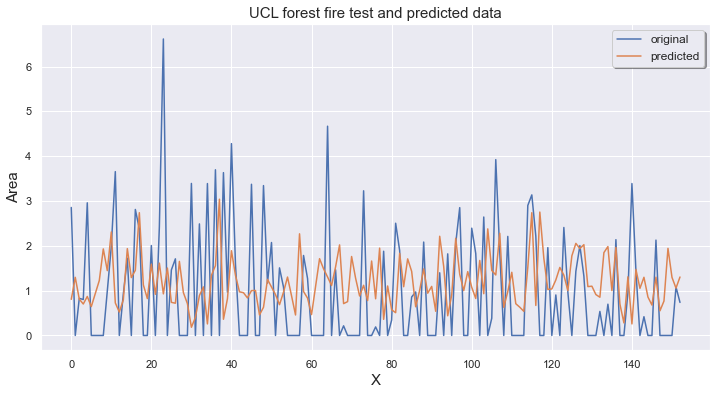

In [65]:
# visualizing the actual and predicted values in a plot

x_ax = range(len(y_test))
plt.figure(figsize=(12, 6))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_pred, label="predicted")
plt.title("UCL forest fire test and predicted data", fontsize=15)
plt.xlabel('X', fontsize=15)
plt.ylabel('Area', fontsize=15)
plt.legend(loc='best',fancybox=True, shadow=True, fontsize=12)
plt.grid(True)
plt.rc('xtick', labelsize=1) 
plt.rc('ytick', labelsize=1) 
plt.show()  

### Feature Importance
Let us find which feature is contributing most to the predictions made by the model.

In [66]:
regressor.feature_importances_

array([0.01152897, 0.01545201, 0.01274678, 0.02032073, 0.00449292,
       0.01829739, 0.01115618, 0.01267593, 0.00809883, 0.01769555,
       0.01126574, 0.01612259, 0.01578627, 0.01094055, 0.01710485,
       0.00019872, 0.00127075, 0.00818567, 0.0091747 , 0.00243032,
       0.00018228, 0.00705358, 0.00123339, 0.00446248, 0.00748071,
       0.00015947, 0.00499388, 0.01020528, 0.08084768, 0.11252212,
       0.09208395, 0.08362166, 0.10590629, 0.00040004, 0.15710266,
       0.08577668, 0.02102241])

In [67]:
# sorting the features in ascending order of their importance

sorted_idx = regressor.feature_importances_.argsort()[-10:]

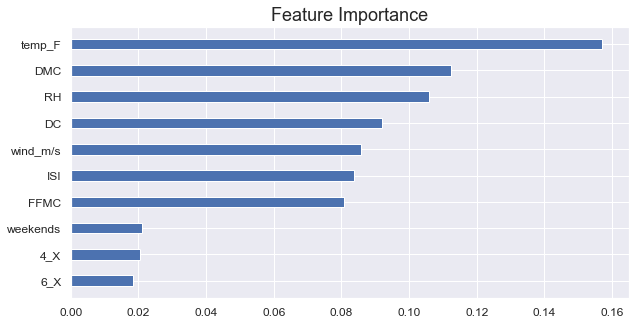

In [68]:
# Plotting the feature importance

plt.figure(figsize=(10,5))
plt.barh(X_test.columns[sorted_idx], regressor.feature_importances_[sorted_idx], height=0.4)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Feature Importance", fontsize=18)
plt.show()



We can see 'temp_F' feature has highest importance followe by 'DMC'

In [69]:
import pickle

In [70]:
filename='model.sav'
pickle.dump(regressor, open(filename, 'wb'))

In [71]:
#loading the saved model
loaded_model=pickle.load(open('model.sav','rb'))